In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

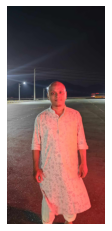

In [3]:
image = cv2.imread("tareq.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [9]:
image_resized = cv2.resize(image_rgb, (224, 224))
image_normalized = image_resized / 255.0

In [10]:
images = np.array([image_normalized])
gender_labels = np.array([1])
age_labels = np.array([25]) 

In [11]:
input_layer = Input(shape=(224, 224, 3))

In [12]:
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

In [13]:
gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)

In [14]:
age_output = Dense(1, activation='linear', name='age_output')(x)

In [15]:
model = Model(inputs=input_layer, outputs=[gender_output, age_output])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss={'gender_output': 'binary_crossentropy', 'age_output': 'mean_squared_error'},
              metrics={'gender_output': 'accuracy', 'age_output': 'mae'})

In [16]:
images = np.array(images)
gender_labels = np.array(gender_labels)
age_labels = np.array(age_labels)

In [17]:
history = model.fit(
    images, 
    [gender_labels, age_labels], 
    epochs=10, 
    batch_size=1
)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 631.2720 - gender_output_loss: 0.7139 - age_output_loss: 630.5581 - gender_output_accuracy: 0.0000e+00 - age_output_mae: 25.1109
Epoch 2/10
1/1 [==============================] - 0s 94ms/step - loss: 546.5397 - gender_output_loss: 0.2650 - age_output_loss: 546.2747 - gender_output_accuracy: 1.0000 - age_output_mae: 23.3725
Epoch 3/10
1/1 [==============================] - 0s 87ms/step - loss: 408.0245 - gender_output_loss: 0.0121 - age_output_loss: 408.0124 - gender_output_accuracy: 1.0000 - age_output_mae: 20.1993
Epoch 4/10
1/1 [==============================] - 0s 81ms/step - loss: 194.5158 - gender_output_loss: 4.8111e-05 - age_output_loss: 194.5157 - gender_output_accuracy: 1.0000 - age_output_mae: 13.9469
Epoch 5/10
1/1 [==============================] - 0s 86ms/step - loss: 6.6287 - gender_output_loss: 5.2271e-09 - age_output_loss: 6.6287 - gender_output_accuracy: 1.0000 - age_output_mae: 2.5746
Epoch 6/10
1/1 

In [21]:
def predict(image_path):
    image = cv2.imread('tareq.jpg')
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (224, 224)) / 255.0
    image_tensor = np.expand_dims(image_resized, axis=0)
    gender_pred, age_pred = model.predict(image_tensor)
    gender = 'Male' if gender_pred[0] > 0.5 else 'Female'
    age = int(age_pred[0])
    plt.imshow(image_rgb)
    plt.title(f'Gender: {gender}, Age: {age}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 92ms/step


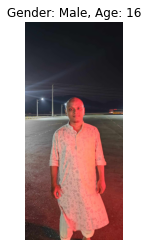

In [22]:
predict("tareq.jpg")